<a href="https://colab.research.google.com/github/cwscx/micrograd/blob/main/micrograd_from_scratch_yay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
  return 3 * x ** 2 - 4 * x + 5  # 3x^2 - 4x + 5 => derivative: 6x - 4

In [4]:
f(3.0)

20.0

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [20]:
h = 0.000000001
x = 2/3
(f(x + h) - f(x))/ h

0.0

In [21]:
a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

4.0


In [26]:
h = 0.0001

#inputs = 2.0
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
a += h
d2 = a * b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)

a = 2.0
d1 = a * b + c
b += h
d2 = a * b + c
print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)

b = -3.0
d1 = a * b + c
c += h
d2 = a * b + c
print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772
d1 4.0
d2 4.0002
slope 2.0000000000042206
d1 4.0
d2 4.0001
slope 0.9999999999976694


In [48]:
class Value:

  def __init__(self, data, _children=(), _op='', label='') -> None:
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self) -> str:
    return f"Value(data={self.data})"

  def __add__(self, other: Value) -> Value:
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other: Value) -> Value:
    out = Value(self.data * other.data, (self, other), '*')
    return out

In [53]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10, label='c')
e = a * b
e.label = 'e'
d = e + c
d.label = 'd'
f = Value(-2.0, label='f')
L = d * f
L.label = 'L'
print(d._prev, d._op)

{Value(data=-6.0), Value(data=10)} +


In [51]:
from graphviz import Digraph

def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format="svg", graph_attr={'rankdir': 'LR'})

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))

    dot.node(name = uid, label = "{%s | data %.4f}" % (n.label, n.data, ), shape='record')
    if n._op:
      dot.node(name = uid + n._op, label = n._op)
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

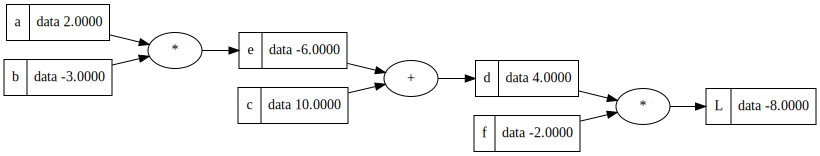

In [54]:
draw_dot(L)